In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.CodeMirror-scroll { overflow-x: auto; }
div.text_cell_render.rendered_html{font-size:14pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:18px;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

<font size="5" color="red"><b>ch3. 분류분석</b></font>
# 1절. 분류분석 개요
## 1-1 분류분석이란?
    * 타겟변수가 categorical 변수인 분석
        - 수업ex. mnist 숫자예측, iris 분류예측, 와인등급예측, 질병예측
        - ex. 고객등급예측, 휴면고객예측, 상품구매예측, 보험사기예측...
    * sklearn 패키지 : 예제데이터셋, 전처리, 머신러닝 모형
## 1-2 샘플용 데이터 셋 접근
### load 계열(패키지 내에 데이터 있음) 
    - seaborn, tensorflow에도 있음
    - load_iris(), load_boston(), load_diabets(),...

### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터 뉴스 말뭉치)

### make 계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수X)

In [7]:
# load 계열
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

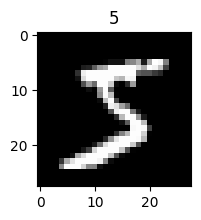

In [8]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [9]:
# fetch 계열 -받을 데이터가 크면 그만큼 시간이 걸린다.
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784",
                     version=1,
                     as_frame=False, #데이터프레임으로 받을 지 여부(False:넘파이 배열)
                     parser="auto")
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

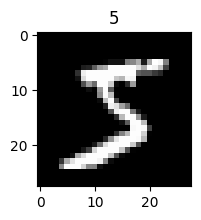

In [10]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(y[0])
plt.show()

# 2절. 분류모형의 종류
- predict()

## 2-1 확률적 모형

    - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
    - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부 판별함수 모형에 있기는 함)
    - predict_log_proba() : 확률의 로그값을 알려줌   
    
### 1) 확률적 생성 모형

    - 각 클래스별 특징 데이터 확률분포 추정하는 방식. 소량의 데이터로도 작동
    - ex) QuadraticDiscriminantAnalysis, MultinomialNB => 잘 못 맞춘다  
    
### 2) 확률적 판별 모형

    - 확률을 계산하는 함수 이용
    - ex) 의사결정나무, 로지스틱 회귀 
    
## 2-2 판별함수 모형

    - 주어진 데이터를 클래스에 따라 다른 영역으로 나누는 경계면을 찾은 후,
    - 이 경계면을 계산하는 식(판별함수)
    - 경계면 식의 결과값을 받아올 수 있다.
    - decision_function()
    - ex) 퍼셉트론, SVM(soft vector machine), MLP(신경망)
=> RandomForest, LGBM, XGBoost, CatBoost 등의 앙상블 모형이 더 많이 쓰임

# 3절. 모형1 : 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA
- x가 연속형(실수)이면 정규분포라고 가정함

In [11]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,     # 독립변수 2개
                           n_informative=2,  # 타겟변수에 영향주는 독립 변수 갯수
                           n_redundant=0,    # 타겟변수에 영향을 주지 않는 독립 변수 갯수
                           n_clusters_per_class=1, # 클래스(그룹) 내 서브그룹수
                           n_classes=2,      #타겟변수의 class 수
                           n_samples=100,    # 데이터 갯수(행수) 100이 기본값
                           random_state=9)   # seed값
X.shape, y.shape                      

((100, 2), (100,))

In [12]:
import numpy as np
np.unique(y)

array([0, 1])

In [13]:
# 타겟변수의 클래스 균형 확인
import pandas as pd
pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [14]:
# 타겟변수의 클래스 균형
# y=1로 분류된 데이터
X[y==1].shape, X[y==0].shape

((50, 2), (50, 2))

In [15]:
# 타겟변수의 클래스 균형
y.mean()

0.5

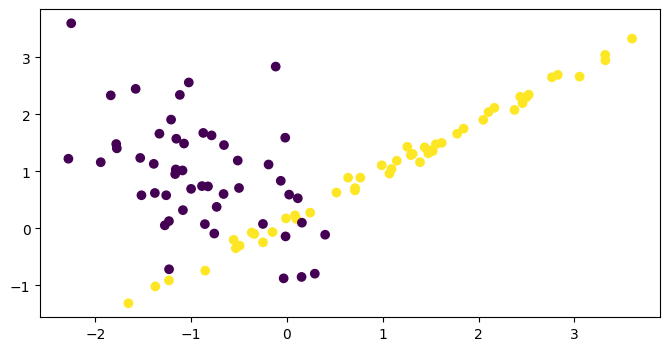

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [11]:
# (0,0) 기준으로 대칭구조
X[y==1] = -X[y==0]

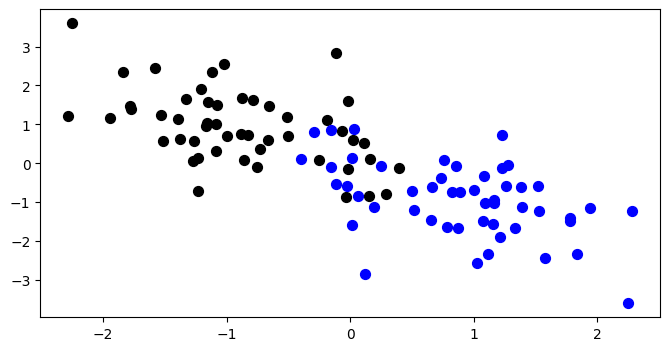

In [12]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[y==0,0], y=X[y==0,1], c='k', s=50, edgecolors='k')
plt.scatter(x=X[y==1,0], y=X[y==1,1], c='b', s=50)

In [13]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

In [14]:
x = [[0.5,0],[0,0],[-0.5,0]]  #pridict할 때는 2차원 데이터로
model.predict(x)

array([1, 0, 0])

In [15]:
model.predict_proba(x)

array([[0.16455419, 0.83544581],
       [0.5       , 0.5       ],
       [0.83544581, 0.16455419]])

In [16]:
model.classes_ # 분류될 내용

array([0, 1])

In [17]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


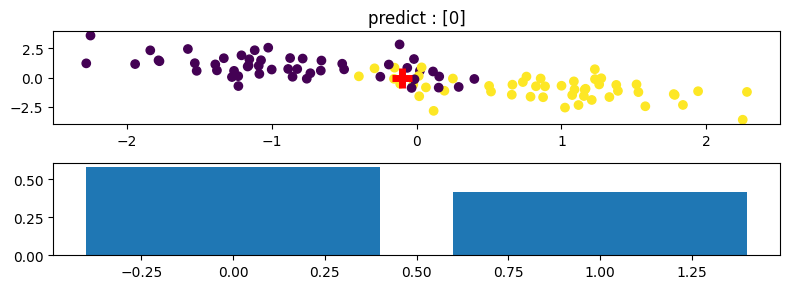

In [18]:
x = [[-0.1, 0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
plt.subplot(211)   #2행1열 subplot에서 첫번째 그래프
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=5)
h = model.predict(x)
plt.title(f'predict : {h}')
plt.subplot(212)
plt.bar(model.classes_, p[0])
plt.tight_layout()
plt.show()

In [19]:
model.classes_

array([0, 1])

## 3-2 나이브베이지안 모형

In [22]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
# 학습데이터는 numpy배열로 해야- 텐서플로우가 넘파이 배열로
X = iris.iloc[:, :-1].values  # 넘파이로 변환
y = iris.iloc[:, -1].values  # 라벨인코딩없이 넘파이 배열로 변환
# 모형 생성/학습
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [21]:
X.loc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [25]:
x = [[5.1, 3.5, 1.4, 0.2]]  # 예측할 때는 넘파이배열로 해야
h = model.predict(x)
p = model.predict_proba(x)[0]
print('예측 :', h)
print(model.classes_)
print(p)

예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[0.75199536 0.16092948 0.08707516]


<BarContainer object of 3 artists>

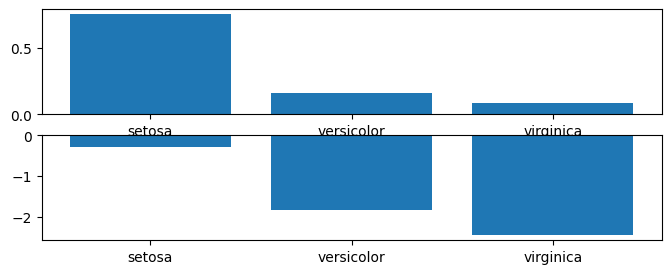

In [27]:
plt.figure(figsize=(8,3))
plt.subplot(211)   #2행1열 subplot에서 첫번째 그래프
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.subplot(2,1,2)
# plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.bar(model.classes_, np.log(model.predict_proba(x))[0])

# 4절. 모형2: 확률적 판별모형
## 4-1 로지스틱 회귀분석

In [29]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1,     # 독립변수 2개
                           n_informative=1,  # 타겟변수에 영향주는 독립 변수 갯수
                           n_redundant=0,    # 타겟변수에 영향을 주지 않는 독립 변수 갯수
                           n_clusters_per_class=1, # 클래스(그룹) 내 서브그룹수
                           n_classes=2,      #타겟변수의 class 수
                           n_samples=100,    # 데이터 갯수(행수) 100이 기본값
                           random_state=1)   # seed값
X.shape, y.shape   

((100, 1), (100,))

In [30]:
# 타겟변수의 클래스별 균형 확인
print(y.mean())

0.5


In [31]:
# 모형 - 타겟변수가 숫자면 회귀분석이나 실제 데이터가 0과1밖에 없어서 분류분석에 가깝다.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [32]:
# -3부터 3까지 같은 간격 데이터
xx = np.linspace(-3, 3, 100)
test_x = xx.reshape(-1,1)
#test_x = [(x,x) for x in xx]
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)

In [33]:
# prob[:,0]  # 0으로 분류된 확률
# prob[:,1]  # 1로 분류된 확률

In [34]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

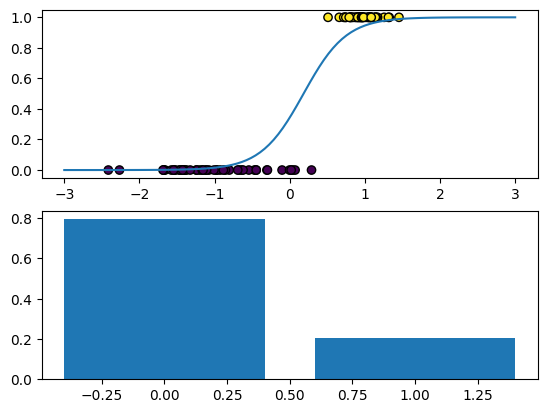

In [35]:
x = [[-0.2]]
plt.subplot(211)
plt.scatter(X, y, c=y, edgecolors='k')
plt.plot(xx, prob[:,1])
plt.subplot(212)
prob_x = model.predict_proba(x)[0]
plt.bar(model.classes_, prob_x)

## 4-2 의사결정나무
- 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형
- ★ 종속변수에 영향을 주는 독립변수들을 알아보는 목적

In [36]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:]  # petal_length, petal_width
# data  # 우리가 필요한건 target_names
# data.target_names[data.target]  # 머신러닝 모형에 넣을거면 여기까지
y = data.target # 라벨인코딩된 y
data.feature_names[2:]  # list
[name for name in data.feature_names[2:]] #['petal length (cm)', 'petal width (cm)']
[name[:-5].replace(' ','_') for name in data.feature_names[2:]]
feature_names = [name[:-5].replace(' ','_') for name in data.feature_names[2:]]

In [37]:
import numpy as np
np.c_[X,y]

array([[1.4, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.7, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.1, 0. ],
       [1.5, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.1, 0.1, 0. ],
       [1.2, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.3, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.7, 0.3, 0. ],
       [1.5, 0.3, 0. ],
       [1.7, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1. , 0.2, 0. ],
       [1.7, 0.5, 0. ],
       [1.9, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.4, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.5, 0.1, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.2, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.3, 0.3, 0. ],
       [1.3, 0.3

In [38]:
# 모형-간단한 나무
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',  # 품질기준을 entropy
                                  max_depth=1,
                                  random_state=0,  # seed값
                                 )
dt_model.fit(X,y)  # depth 1짜리 tree 라 성능이 좋지 않을 듯

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [39]:
X[0]

array([1.4, 0.2])

In [40]:
test_x = [[1.4, 0.2]]
dt_model.predict(test_x)

array([0])

생성된 tree시각화

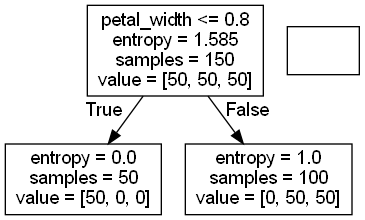

In [41]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

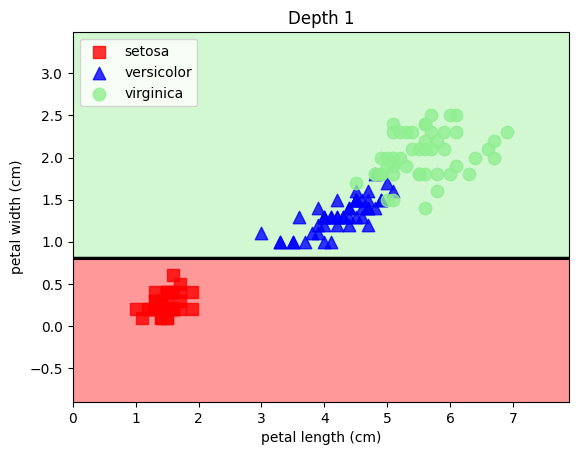

In [43]:
plot_decision_regions(X, y, dt_model, "Depth 1")
plt.show()

In [44]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X,y) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

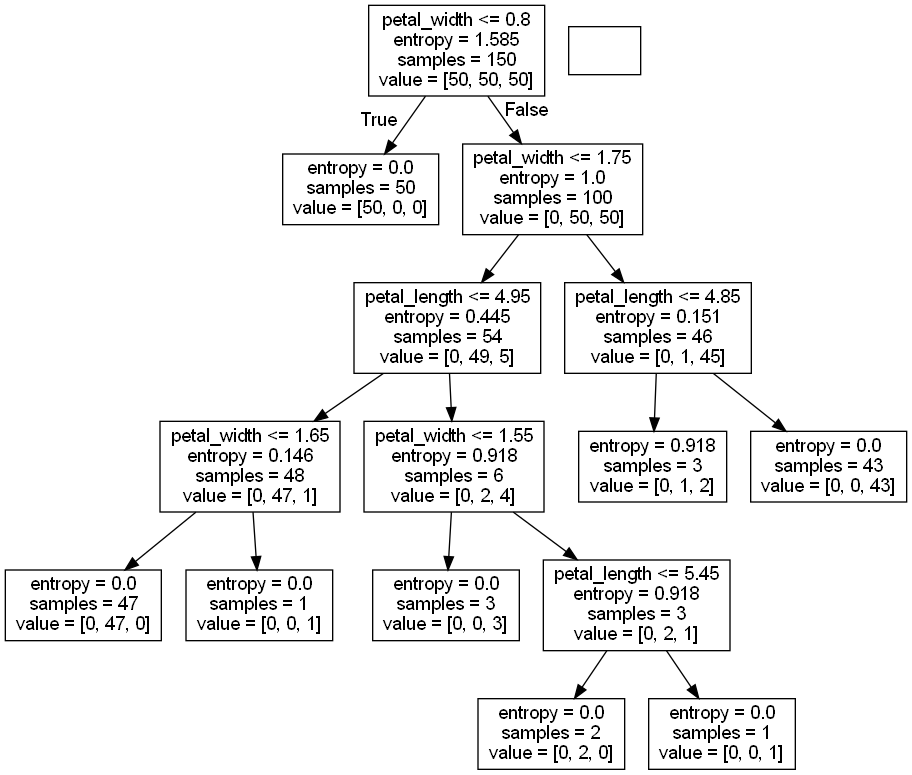

In [45]:
draw_decision_tree(dt_model5, feature_names=feature_names)

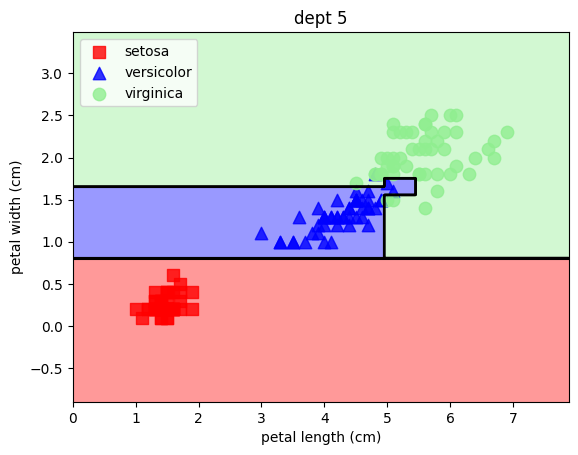

In [46]:
plot_decision_regions(X, y, dt_model5, "dept 5")
plt.show()

In [47]:
dt_model5.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 모형3 : 판별함수 모형
- 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면을 정의
- decision_function() 제공
- 퍼셉트론, SVM, 인공신경망모형(일부는 predict_proba도 있음)

## 5-1 Perceptron

In [48]:
iris = load_iris()
# 0그룹, 2그룹(setosa, virginica)만
# idx = 0~49,100~149
idx = np.in1d(iris.target, [0,2])
import pandas as pd
idx = pd.Series(iris.target).isin([0,2]).values

In [49]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
# 퍼셉트론 모형   - predict_proba가 안된다
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=500, # epoch 500회
                   eta0=0.1,      # learning rate 학습률, 보폭
                   random_state=1).fit(X,y)

In [51]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
(y != y_hat).sum()

1

In [53]:
# 예측값이 틀린 경우
X[y != y_hat]

array([[4.5, 2.3]])

In [54]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    # print(idx, real, hat)
    if real != hat:
        print(f"{idx}번째 실제값:{real}, 예측값:{hat} = 데이터: {X[idx]}")

41번째 실제값:0, 예측값:2 = 데이터: [4.5 2.3]


In [55]:
test_x = X[41].reshape(1, -1)  # predict 하려면 2차원 이어야한다.
test_x = X[41][np.newaxis, :]  # 제일 많이 쓴다
test_x = np.expand_dims(X[41], axis=0)
test_x = X[41][None, :]  # 거의 안쓴다
print(model.predict(test_x))
print(model.decision_function(test_x))  # 틀린값의  경계선과의 거리(경계선에서 가까우면 틀릴확률이 높다)

[2]
[1.24]


In [56]:
test_x = X[50].reshape(1,-1)
print(model.decision_function(test_x))

[2.028]


## 5-2 SVC
- support Vector Classifier

In [57]:
from sklearn.svm import SVC
model = SVC(
    # probability=True ## False가 default
)
model.fit(X, y)

SVC()

In [58]:
test_x = X[41].reshape(1, -1) 
print(test_x)
print('예측 :', model.predict(test_x))
print('경계면과의 거리 :', model.decision_function(test_x))
# print('예측 확률들 :', model.predict_proba(test_x))

[[4.5 2.3]]
예측 : [0]
경계면과의 거리 : [-0.72539221]


## 5-3 다중 퍼셉트론(인공신경망)
- predict/ predict_proba / predict_log_proba

In [59]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_X.shape, iris_y.shape

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=iris_y # 층화추출
                                                   ) 

In [60]:
# 다중 퍼셉트론 모형
from sklearn.neural_network import MLPClassifier   # DNN
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), # hidden layer의 unit수
                    max_iter=500)   # epoch -학습횟수
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [61]:
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,15,0
2,0,0,15


# 6절. 분류 모형 성능 평가
## 6-1 sklearn모형의 성능 평가 방법
- metrics 모듈 : accuracy_score 등 ~_score
- 혼돈행렬을 이용

In [62]:
result = pd.read_csv('data/model_result.csv')  # 보험사기자인지 여부(실제값/예측값)
result.info()   # 타입과 결측치 확인, 메모리 사용량 확인       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  1793 non-null   int64
 1   y_true   1793 non-null   int64
 2   y_pred   1793 non-null   int64
dtypes: int64(3)
memory usage: 42.1 KB


In [63]:
# 실제 보험 사기자, 보험사기자로 예측한 
result['y_true'].sum(), result['y_pred'].sum()

(158, 99)

In [64]:
pd.crosstab(result.y_true, result.y_pred, margins=True)

y_pred,0,1,All
y_true,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

In [66]:
confusion_matrix(result.y_true, result.y_pred)

array([[1613,   22],
       [  81,   77]], dtype=int64)

```
- confusion matrix(혼동행렬,교차표,분류성능평가지표)
         예측0    예측1
실제0      TN      FP  (1종 오류)
실제1      FN      TP
```

In [67]:
accuracy_score(result.y_true, result.y_pred) # 정확도(전체적으로 얼마나 맞췄는지)

0.9425543781372002

In [68]:
precision_score(result.y_true, result.y_pred)  # 정밀도(1로 예측한 것중 얼마나 맞췄는지)

0.7777777777777778

In [69]:
recall_score(result.y_true, result.y_pred)  # 재현율(실제로 1중 얼마나 맞췄는지)

0.4873417721518987

In [70]:
recall_score(result.y_true, result.y_pred, pos_label=0)  # 특이도(실제 0중 얼마나 맞췄는지)

0.9865443425076452

In [71]:
# 위양성률(fallout : FPrate)  :FP/(TN+FP) : 1종 오류 = 1-특이도 -> 낮을 수록 좋다. 가짜로 만든 비율
1 - recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [72]:
f1_score(result.y_true, result.y_pred)   # recall과 precision의 조화평균

0.5992217898832685

In [73]:
# beta=1 : f1_score (recall과 precision의 중요도를 똑같이)
print(fbeta_score(result.y_true, result.y_pred, beta=1))
# beta=0.5 : precision의 가중치가 높음(고객의 만족도가 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))
# beta=2 : recall의 가중치가 높음(회사의 비용이 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=2))

0.5992217898832685
0.6949458483754513
0.5266757865937073


## 6-2. ROC 커브를 이용한 성능 비교
- 위양성률(FPrate)과 재현율(TPrate)의 변화를 시각화 = 모델이 양성을 잘 맞추는 능력(TPrate)과 잘못 예측하는 비율(FPrate)을 비교하는 곡선
- 세로축(재현율) -> 높은게 좋음
- 가로축(위양성율) -> 낮은게 좋음

In [74]:
# 61p
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,
                           # n_features=20,
                           weights=[0.95, 0.05],  # 0과 1의 비율
                           # n_classes=2,
                           random_state=5
                          )
y.sum()

57

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X,y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [76]:
# decision_function()이 없는 모델
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42).fit(X, y)  #random_state=42 100%맞추는 최상의 모델
pred3 = model3.predict(X)
pd.crosstab(y, pred3)

col_0,0,1
row_0,,
0,943,0
1,0,57


In [77]:
import pandas as pd
pred1 = model1.predict(X)
pd.crosstab(y, pred1, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


In [78]:
pred2 = model2.predict(X)
pd.crosstab(y, pred2, rownames=['실제'], colnames=['예측'])

예측,0,1
실제,,
0,940,3
1,30,27


In [79]:
# 1로 구분될 확률
# model3.predict_proba(X)[:,1]

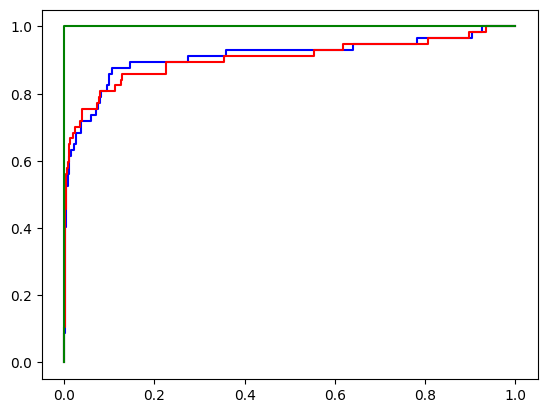

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr1, tpr1, tresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, tresholds2 = roc_curve(y, model2.decision_function(X))
fpr3, tpr3, tresholds3 = roc_curve(y, model3.predict_proba(X)[:,1])
plt.plot(fpr1,tpr1, c='b')
plt.plot(fpr2,tpr2, c='r')
plt.plot(fpr3,tpr3, c='g')
plt.show()

## 6-3 두 모형의 혼돈행렬이 같은 경우
- roc_curve로도 우열을 가리기 힘든 경우 : auc
    * auc = 1 : 완벽한 모델
    * auc = 0.5 : 무작위 모델 (동전던지기)
    * auc < 0.5 : 오히려 반대로 예측하는 경향이 있는 최악의 모델

In [81]:
# roc_curve로 부터 얻은 fpr, tpr값으로 auc
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

(0.9112202563673234, 0.9037227214377407, 1.0)